# Capítulo 2 do livro

In [1]:
import pandas as pd

## Obtendo os dados

In [2]:
housing = pd.read_csv("../datasets/housing/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
import matplotlib.pyplot as plt

<Figure size 2000x1500 with 0 Axes>

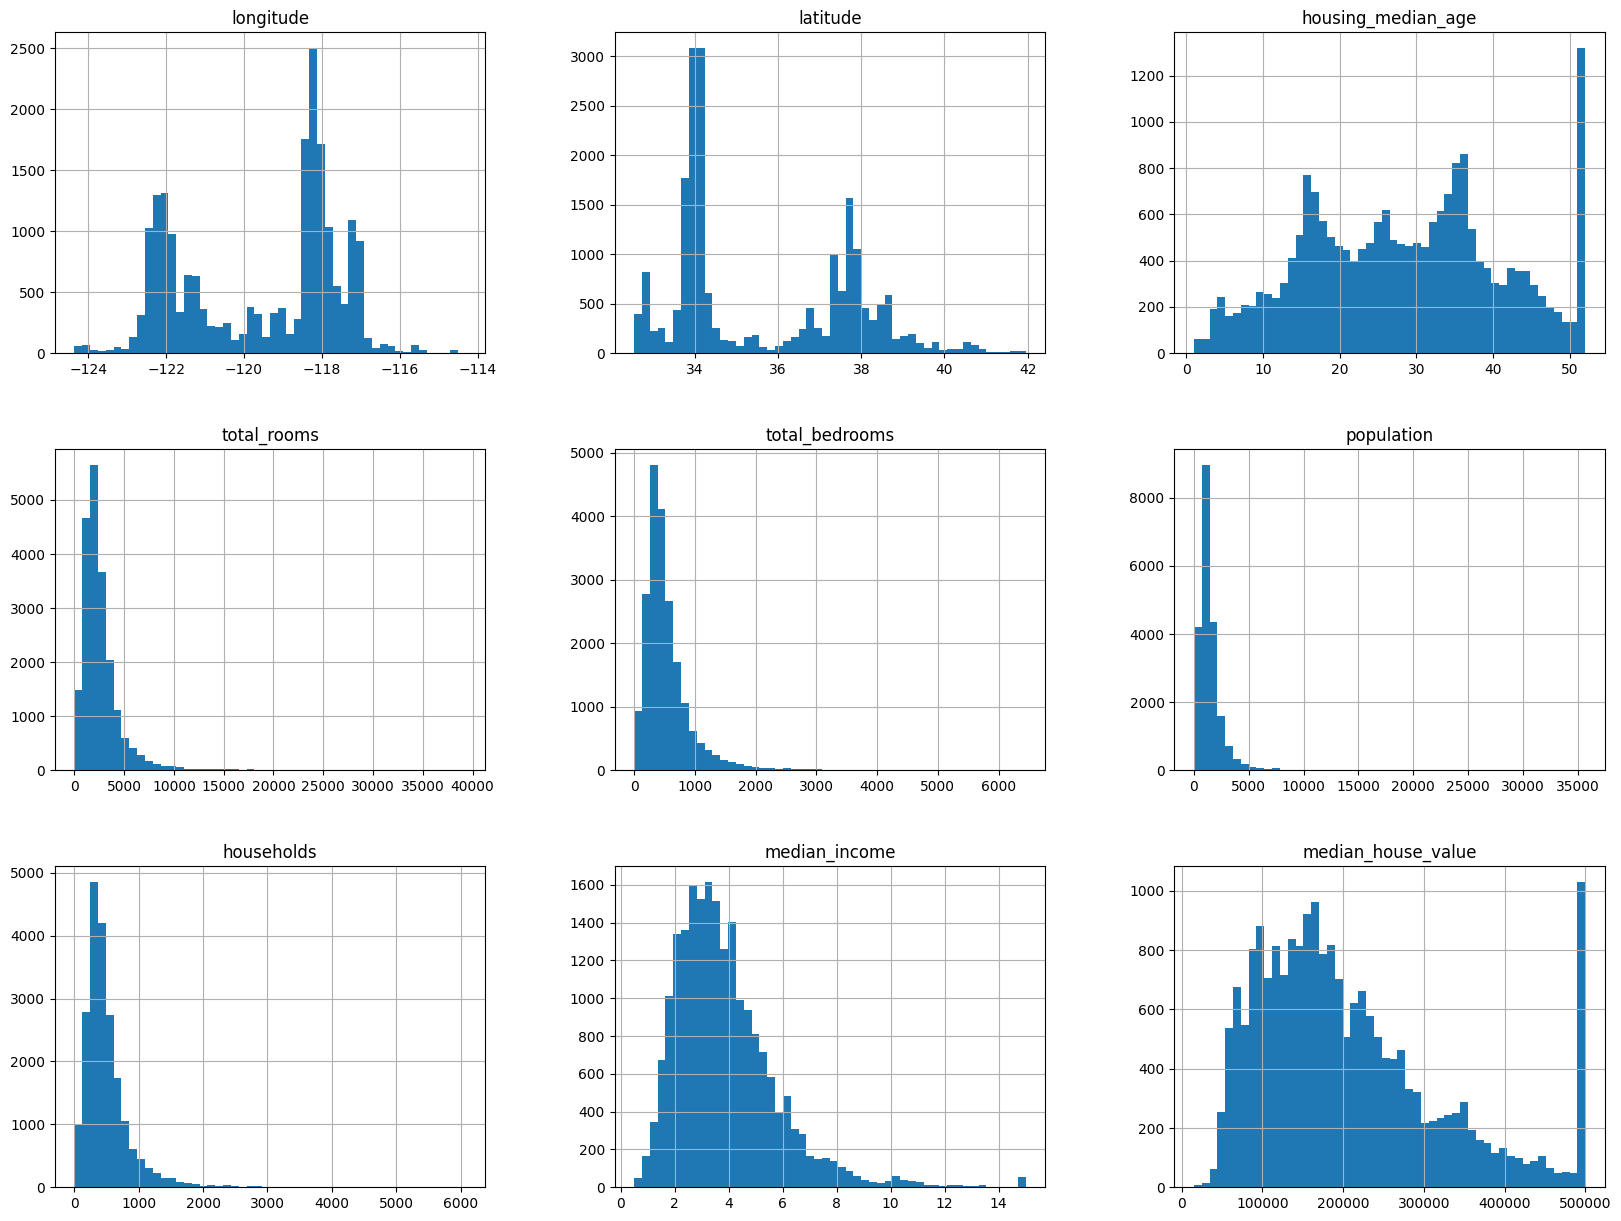

In [8]:
plt.figure(figsize = (20,15))
housing.hist(bins=50,figsize = (20,15))
plt.show()

## Criando um grupo de testes

In [9]:
import numpy as np

In [10]:
np.random.seed(42)
np.random.permutation(15)

array([ 9, 11,  0, 13,  5,  8,  2,  1, 14,  4,  7, 10, 12,  3,  6])

In [11]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data)) # cria uma lista de 0 ao tamanho dos dados -1 com uma ordem aleatória
    test_set_size = int(len(data)*test_ratio) # define o tamanho dos testes ao multiplicar o tamanho dos dados por uma razão de testes
    test_indices = shuffled_indices[:test_set_size] # cria os indices para o teste,correspondendo aos indices de 0 ao tamanho do grupo de testes da lista de indices embaralhados
    train_indices =shuffled_indices[test_set_size:] #cria os indices para treino, eles começam no tamanho do grupo de testes e vão até o tamanho final dos dados
    return data.iloc[train_indices], data.iloc[test_indices] # o comando iloc filtra as listas pelo índice

In [12]:
train_set, test_set = split_train_test(housing,0.2)

In [13]:
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
len(train_set) + len(test_set) == len(housing)

True

Caso se queira atualizar os dados, serão gerados novos índices, mesmo usando a mesma seed do random

A solução para isso é computar identificadores únicos para cada instância, e colocar uma coluna com esse conjunto de dados no data frame. O livro fala em criar um **hash**

Uma função de hash criptográfico, muitas vezes é conhecida simplesmente como hash – é um algoritmo matemático que transforma qualquer bloco de dados em uma série de caracteres de comprimento fixo. Independentemente do comprimento dos dados de entrada, o mesmo tipo de hash de saída será sempre um valor hash do mesmo comprimento. [link da informaçãp](https://www.kaspersky.com.br/blog/hash-o-que-sao-e-como-funcionam/2773/)

In [16]:
from zlib import crc32

zlib.crc32
Python 3.x

Computes a CRC (Cyclic Redundancy Check) checksum of data. The result is an unsigned 32-bit integer. If value is present, it is used as the starting value of the checksum; otherwise, a default value of 0 is used. Passing in value allows computing a running checksum over the concatenation of several inputs. The algorithm is not cryptographically strong, and should not be used for authentication or digital signatures. Since the algorithm is designed for use as a checksum algorithm, it is not suitable for use as a general hash algorithm.

In [17]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32

In [18]:
crc32(np.int64(5))

767742221

In [19]:
0xffffffff

4294967295

In [20]:
crc32(np.int64(5)) & 0xffffffff # não entendi esse comando!

767742221

In [21]:
crc32(np.int64(5)) & 0xffffffff < 0.2*2**32 # cria o hash e verifica se ele é menor que 20% da capacidade máxima, que equivale a 32 bits

True

In [22]:
lista = [0,1,2,3,4,5]
test_set_check(lista,0.2)

False

In [23]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [24]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"index")

Foi utilizado o índice da linha como identificador. Ao se fazer isso, é necessário ter certeza que os novos dados irão para o final do dataset e que nenhuma linha será deletada.

In [25]:
teste = pd.DataFrame(data = {'coluna1':[110,34,54,12],'coluna2':[12,34,12,54]})
teste

,coluna1,coluna2
0,110,12
1,34,34
2,54,12
3,12,54


In [26]:
teste.reset_index() # foi criada uma coluna de índice!

,index,coluna1,coluna2
0,0,110,12
1,1,34,34
2,2,54,12
3,3,12,54


O índice poderia ser a latitude e a longitude

In [27]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"id")

Podemos usar a biblioteca scikit-learn para fazer a divisão dos dados

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

*stratified sampling* -> a populção é dividida em subgrupos homogêneos chamados *strata* e o número certo de instâncias são amostradas de cada estrato

In [30]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0.,1.5,3.0,4.5,6.,np.inf],
                               labels = [1,2,3,4,5])

Estamos supondo que a coluna de rendimento médio é muito importante para estimar o preço da casas. Teremos que estratificar esta coluna.

<AxesSubplot: >

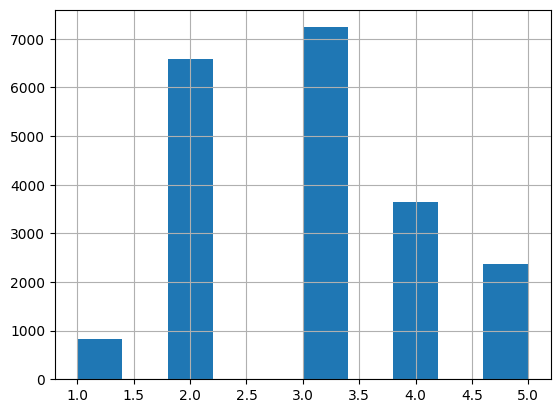

In [31]:
housing["income_cat"].hist()

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Vamos a proporção da categoria de rendimentos no grupo de testes:

In [34]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Proporção no grupo de treino:

In [35]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

Proporção no conjunto completo de dados:

In [36]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [37]:
for set_ in (strat_train_set, strat_test_set): # remover "income_cat" do dataset
    set_.drop("income_cat", axis=1, inplace=True)

In [38]:
housing = strat_train_set.copy() # cria uma cópia do grupo de testes estratificado

## Visualizando os dados

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

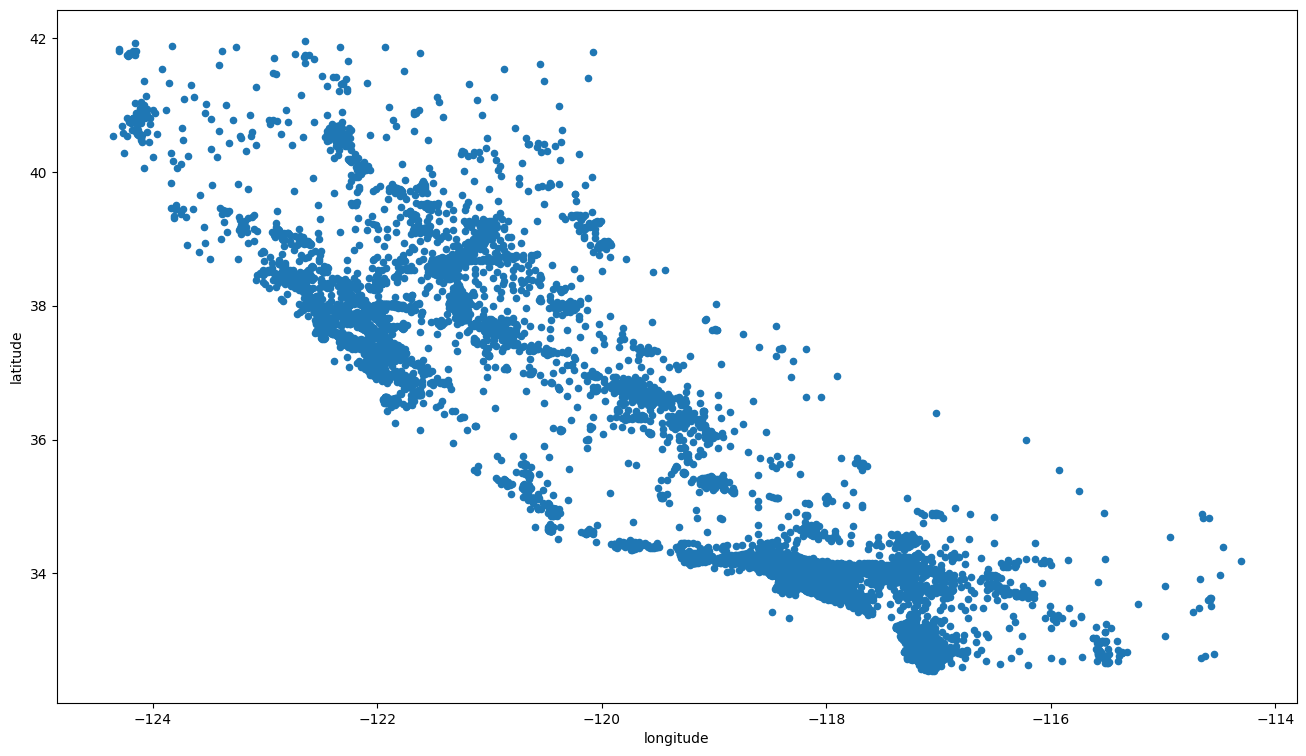

In [39]:
housing.plot(kind="scatter", x = "longitude", y = "latitude",figsize=(16,9))

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

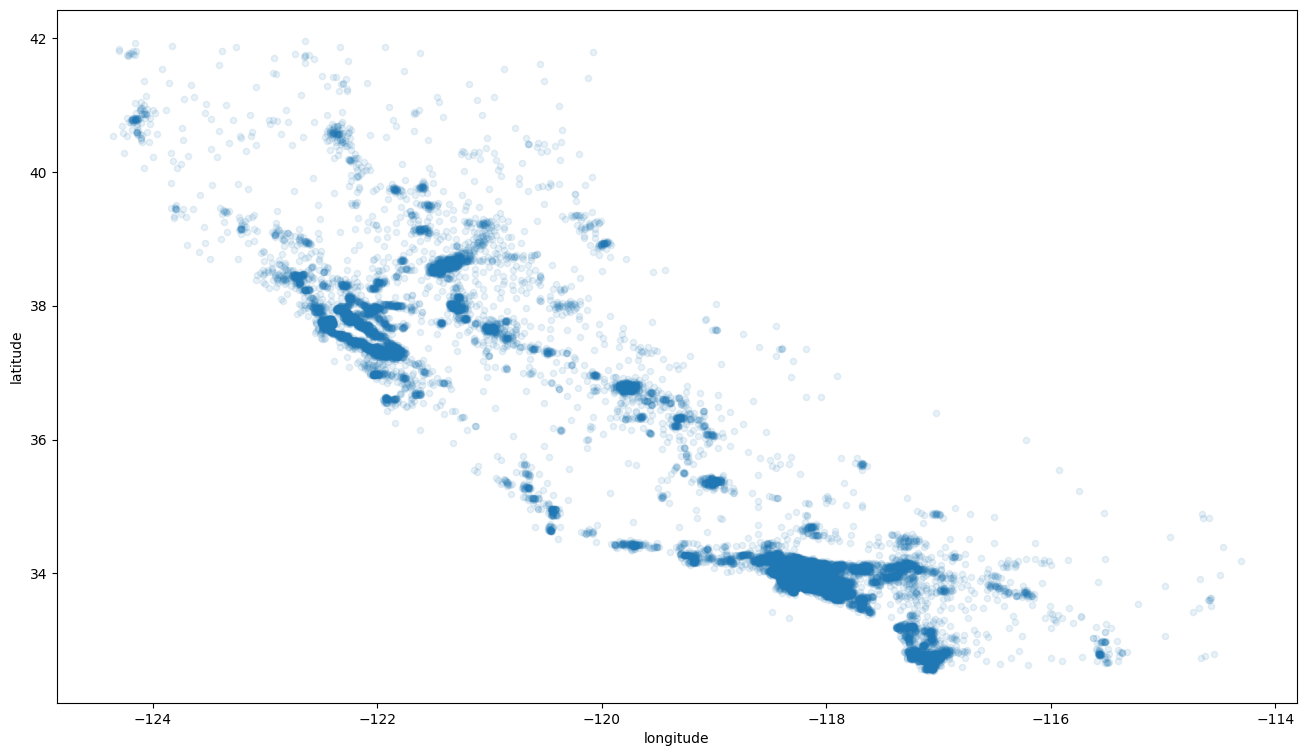

In [40]:
housing.plot(kind="scatter",x="longitude",y="latitude",figsize=(16,9),alpha=0.1)

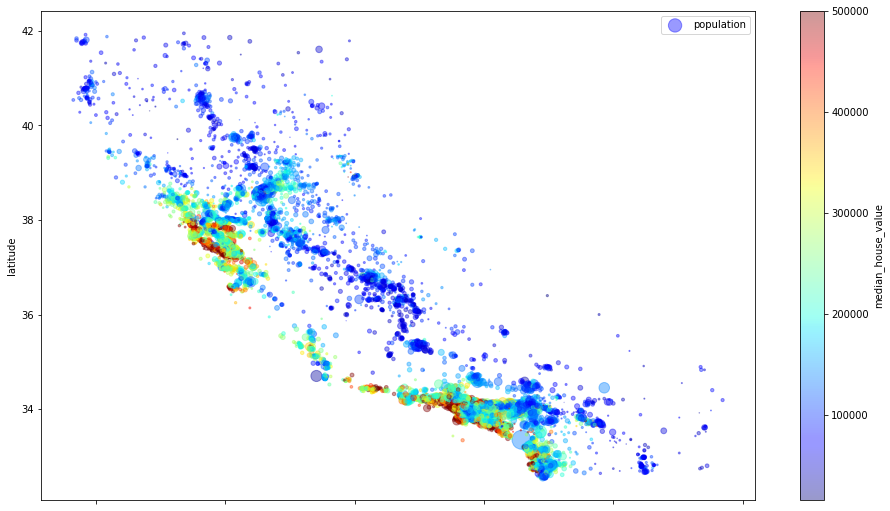

In [41]:
housing.plot(kind="scatter", x="longitude", y = "latitude", alpha=0.4,
             s=housing["population"]/100, label = "population",
             figsize=(16,9),
             c="median_house_value",cmap=plt.get_cmap("jet"),
             colorbar=True)
plt.legend()

Procurando correlações -> Como o dataset não é muito grande, pode-se facilmente computar o **coeficiente de correlação padrão (também chamado de Pearson's r)** entre todos os pares de atributos usando o método ```corr()```:

In [41]:
corr_matrix = housing.corr()

/tmp/ipykernel_37040/2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


Agora vamos ver como cada valor se correlaciona com o valor médio das casas:

In [42]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [43]:
from pandas.plotting import scatter_matrix

In [44]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

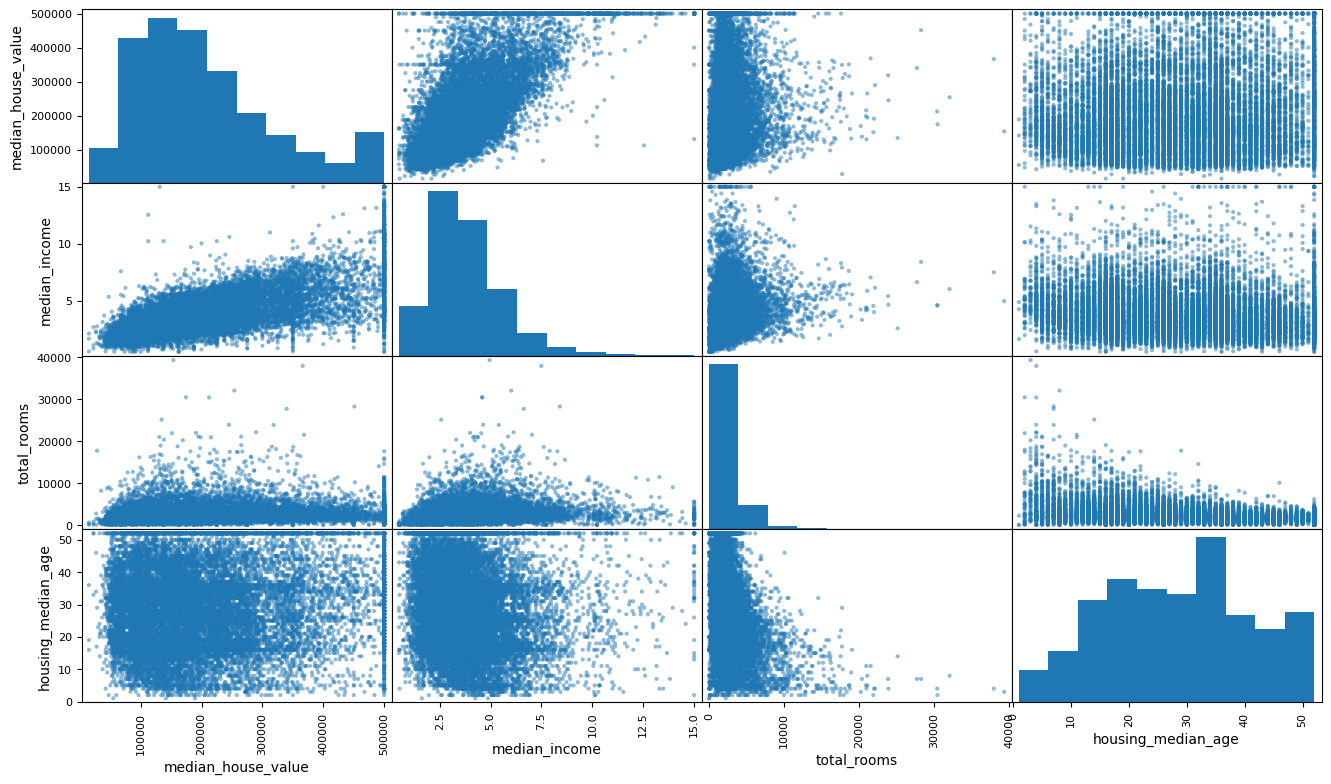

In [45]:
scatter_matrix(housing[attributes],figsize=(16,9))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

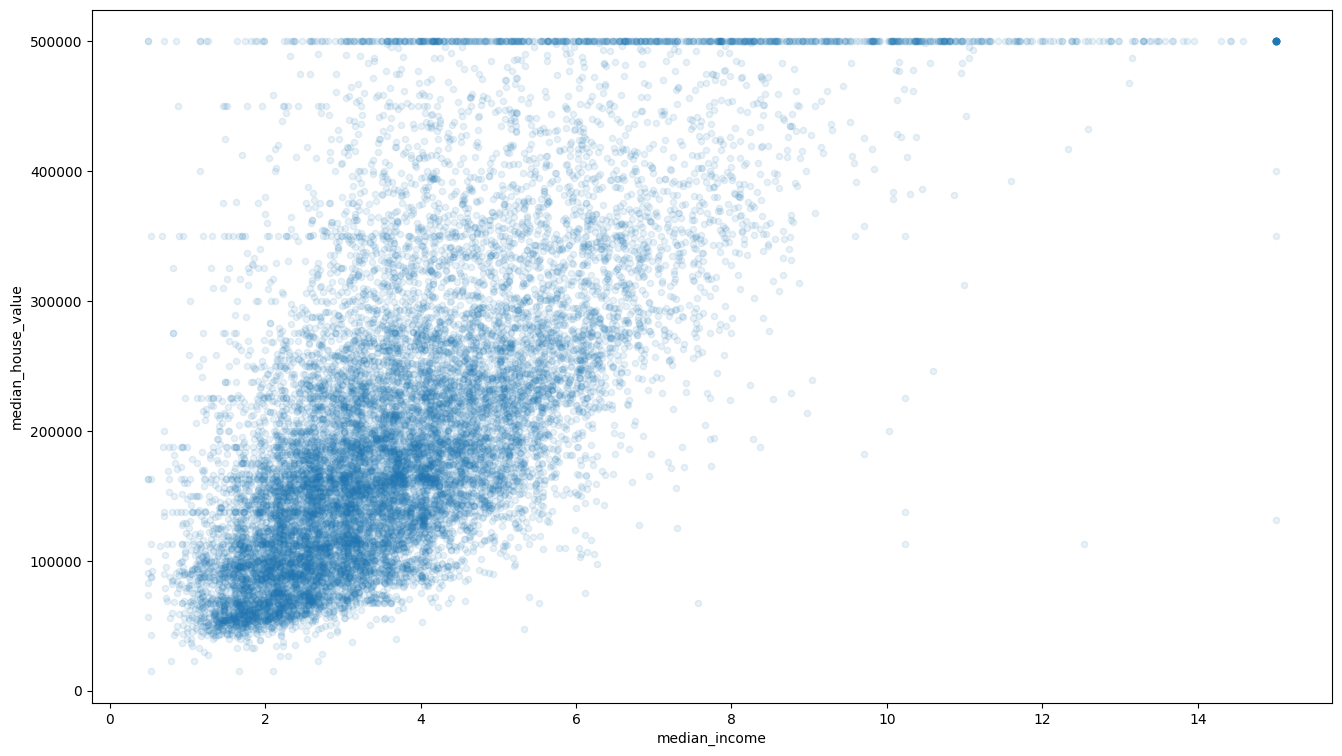

In [46]:
housing.plot(kind="scatter", x = "median_income", y = "median_house_value",alpha=0.1,figsize=(16,9))

In [47]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing["population"]/housing["households"]

In [49]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Preparando os dados para os algortimos de Machine Learning

Vamos criar uma cópia do conjunto de treino e separar os preditores e os rótulos.

In [50]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

**Limpando os dados:**

A maioria dos algritmos de machine learning não conseguem trabalhar com dados ausentes, então vamos criar uma função para eliminá-los. O atributo ```total_bedrooms``` não possui alguns dados. Temos três opções:
1. Nos livrar dos distritos correspondentes.
2. Nos livrar de todo o atributo.
3. Definir os valores para algum valor (zero, a média, a mediana, etc.).

Essas três opções podem ser alcançadas através de: ```dropna()```, ```drop()``` e ```fillna()```:

In [51]:
housing.dropna(subset=['total_bedrooms']) # opção 1
housing.drop("total_bedrooms", axis=1) # opção 2
median = housing["total_bedrooms"].median() # opção 3
housing["total_bedrooms"].fillna(median, inplace = True)

Opção 3 usando comandos do Scikit-learn

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
imputer = SimpleImputer(strategy = "median")

A média só pode ser calulada para atributos numéricos, é necessário criar uma cópia dos dados sem o texto do atributo ocean_proximity:

In [54]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [55]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [56]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [57]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Inserindo esses dados em um dataframe:

In [58]:
X = imputer.transform(housing_num)

In [59]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [60]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


![](fig2-1.png)
![](fig2-2.png)

Teremos agora que lidar com os atributos de texto. Neste conjunto de dados existe apenas um: o ocean_proximity

In [61]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


Este não é um texto arbitrário, existe um certo número de possibilidades:

In [62]:
pd.unique(housing_cat['ocean_proximity'])

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

A maioria dos aloritmos de ML prefere trabalhar com números, então vamos converter essas categorias de texto para números, para isso usaremos a classe do Scikit-Learn chamada `OrdinalEncoder`

In [63]:
from sklearn.preprocessing import OrdinalEncoder

In [64]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [65]:
ordinal_encoder.categories_ # Imprime a lista de categoria utilizadas 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Um problema com essa representação é o algoritmo de ML pode assumir que dois valores próximos são mais similares que dois valores distantes. 

Uma representação melhor é criar uma matriz que preenchida com 0s(não) e 1s(sim) para cada um desses atributos.

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [68]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [69]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Podemos criar nossos próprios transformadores para tarefas customizadas. 

Deve-se criar uma classe para isso e ela deve conter:

* fit(retornando self)
* transform()
* fit_transform()

Podemos obter esse último de graça simplesmente adicionando `TransformerMixin`. Se adicionarmos `BaseEstimator`como uma classe base, também teremos dois métodos extras (get_params() e set_params()), isto será útil para ajuste de hiperparâmetros.

Segue um exemplo de uma classe que adiciona os atributos de transformação descutidos anteriormente:

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

In [71]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [72]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
                         

In [73]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_Extra_attribs = attr_adder.transform(housing.values)

### Escalonamento de Features

Uma das transformações mais importantes que precisamos aplicar nos nossos dados é o escalonamento de propriedades. Com poucas exceções, algorítimos de  Machine Learning não performam bem quando as entradas numéricas dos atributos têm diferentes escalas. 

Este é o caso para os dados do data frame housing, onde o número total de quartos varia de 6 a 39.220, enquanto a entrada média apenas varia de 0 a 15. Observe que escalonar o alvo, geralmente, não é necessário. 

Existem duas maneiras comuns de se fazer isso:
* min-max scalling (normalization)
* standardization

Obs.: no min-max scalling os valores por default ficam entre 0 e 1 (isso pode ser altetado). O stadardization é menos sensível a outliers.

## Transformation Pipelines

Como pode ser visto, existem muitos passos de transformação de dados que precisam ser executados na sequência certa. Felizmente, o Scikit-Learn providencia a calsse pipeline para ajudar com essas sequências de transformações. 

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [75]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('atribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [76]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

O construtor Pipeline pega uma lista de pares nomes/estimadores definindo uma sequência de passos. Todos os estimadores, com exceção do último, devem ser transformadores (isto é, eles devem ter um método fit_transform()). 



Quando se chama o método do pipeline fit(), ele chama fit_transform() sequencialmente em todos os transformadores, passando o output de cada chamada como parâmetro de chamada para o próximo até chegar ao último estimador.

Até agora, lidamos com colunas de categoria e numéricas separadamente. O ColumnTransformer consegue lidar com os dois tipos de coluna ao mesmo tempo, aplicando os transformadores apropriados para cada coluna.

In [77]:
from sklearn.compose import ColumnTransformer
cat_attribs = ['ocean_proximity']

In [78]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [79]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attribs),
    ('cat',OneHotEncoder(), cat_attribs),
])

In [80]:
housing_prepared = full_pipeline.fit_transform(housing)

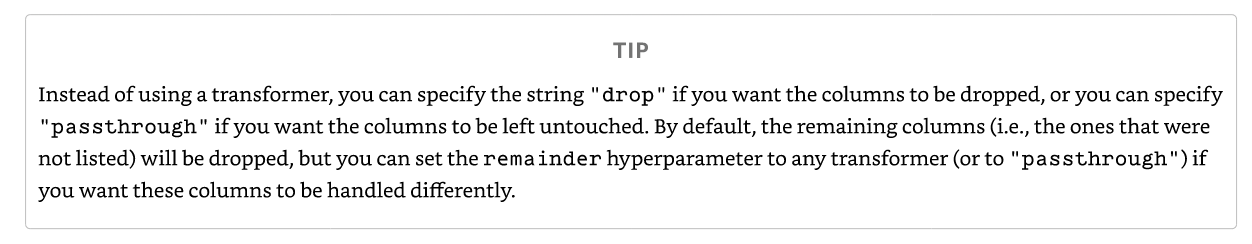

## Selecionando e treinando um modelo

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [83]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [84]:
print('Labels:', list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
housing_predictions = lin_reg.predict(housing_prepared)

In [87]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [88]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018743

Os valores de median_housing_values para a maioria dos distritos varia de $120.000 a $265.000, então uma previsão de erro de $68.628 não é satisfatória. 

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [91]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [92]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

O código a seguir divide aleatoriamente o conjunto de treino em 10 subconjuntos chamados de folds, e então ele treina e testa o modelo Decision Tree 10 vezes, pegando um fold diferente para avaliação a cada vez e treinando nos outros 9 folds. O resultado é uma array contendo as 10 potuações avaliadas.

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring='neg_mean_squared_error',cv=10)

In [95]:
tree_rmse_scores = np.sqrt(-scores)

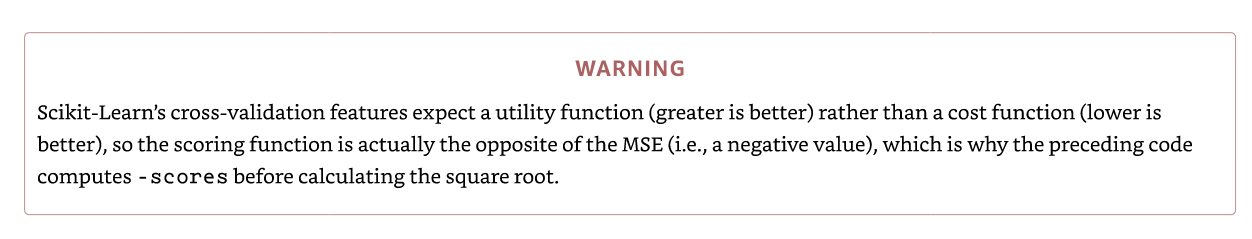

In [96]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [97]:
display_scores(tree_rmse_scores)

Scores [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean: 71432.52332065887
Standard deviation: 2696.6824522410743


Vamos computar as pontuações para o modelo de regressão linear:

In [98]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring='neg_mean_squared_error',cv=10)

In [99]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


Vamos testar agora o modelo RandomForestRegressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [102]:
forest_rmse_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring='neg_mean_squared_error',cv=10)

In [103]:
forest_rmse = np.sqrt(forest_rmse_scores)

/tmp/ipykernel_11831/1475617114.py:1: RuntimeWarning: invalid value encountered in sqrt
  forest_rmse = np.sqrt(forest_rmse_scores)


In [104]:
display_scores(forest_rmse_scores)

Scores [-2.63581876e+09 -2.42458547e+09 -2.20678258e+09 -2.69539484e+09
 -2.21234140e+09 -2.68632875e+09 -2.79218760e+09 -2.45274388e+09
 -2.30038175e+09 -2.92347904e+09]
Mean: -2533004405.677115
Standard deviation: 236991842.28967386


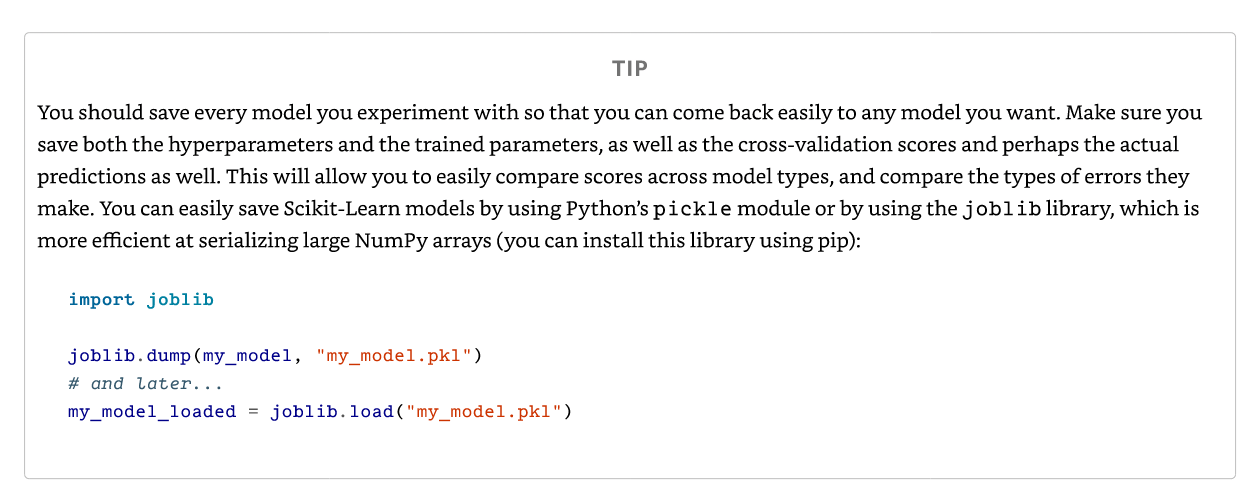

## Ajuste fino do modelo

### Grid Search

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

In [107]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv =5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [109]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [113]:
cvres = grid_search.cv_results_

In [115]:
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63298.325280791854 {'max_features': 2, 'n_estimators': 3}
55270.34904709105 {'max_features': 2, 'n_estimators': 10}
52764.37907812309 {'max_features': 2, 'n_estimators': 30}
59915.231517953645 {'max_features': 4, 'n_estimators': 3}
52250.00971218671 {'max_features': 4, 'n_estimators': 10}
50523.76956271084 {'max_features': 4, 'n_estimators': 30}
58765.92610607112 {'max_features': 6, 'n_estimators': 3}
51730.966110363326 {'max_features': 6, 'n_estimators': 10}
49946.273624879475 {'max_features': 6, 'n_estimators': 30}
59277.60503739721 {'max_features': 8, 'n_estimators': 3}
52330.73545038374 {'max_features': 8, 'n_estimators': 10}
50227.668503643676 {'max_features': 8, 'n_estimators': 30}
62861.2715675933 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53857.8212549715 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60006.561171063295 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52604.14159908305 {'bootstrap': False, 'max_features': 3, 'n_estimators'

O RandomForestRegressor pode indicar a importância relativa de cada atributo para se fazer previsões mais acuradas.

In [119]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.02540413e-02, 7.30975513e-02, 4.21462904e-02, 1.94599329e-02,
       1.66305656e-02, 1.82993131e-02, 1.50495682e-02, 3.03111918e-01,
       6.20480248e-02, 1.06221557e-01, 8.14535860e-02, 9.36554568e-03,
       1.67342766e-01, 6.92925556e-05, 1.89090481e-03, 3.55914297e-03])

Vamos exibir a ointuação dessas importâncias por nomes:

In [120]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.3031119176071169, 'median_income'),
 (0.16734276601874726, 'INLAND'),
 (0.10622155666897516, 'pop_per_hhold'),
 (0.0814535860261664, 'bedrooms_per_room'),
 (0.08025404133343494, 'longitude'),
 (0.07309755133984223, 'latitude'),
 (0.06204802478201258, 'rooms_per_hhold'),
 (0.04214629041432651, 'housing_median_age'),
 (0.019459932868257434, 'total_rooms'),
 (0.01829931310645658, 'population'),
 (0.016630565643715827, 'total_bedrooms'),
 (0.01504956816998999, 'households'),
 (0.009365545680866467, '<1H OCEAN'),
 (0.003559142973095881, 'NEAR OCEAN'),
 (0.001890904811381891, 'NEAR BAY'),
 (6.92925556139685e-05, 'ISLAND')]

## Avaliando o Sistema no Conjunto de Testes

In [121]:
final_model = grid_search.best_estimator_

In [122]:
X_test = strat_test_set.drop('median_house_value', axis =1)
y_test = strat_test_set['median_house_value'].copy()

In [123]:
X_test_prepared = full_pipeline.transform(X_test)

In [124]:
final_predictions = final_model.predict(X_test_prepared)

In [126]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47491.48557683056